In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt


In [2]:
pip install pmdarima

     |████████████████████████████████| 592 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 9.5 MB 8.5 MB/s eta 0:00:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
covid=pd.read_csv('/Users/shashanksrivastava/Desktop/Case study (COVID19)/covid_19_india.csv',parse_dates=['Date'],dayfirst=True)

In [5]:
covid=covid[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]

covid.columns = ['date','state','cured','death','confirmed']


In [6]:
UP=covid[covid.state=="Uttar Pradesh"]

In [41]:
UP

date          state    cured  death  confirmed
39    2020-03-04  Uttar Pradesh        0      0          6
50    2020-03-05  Uttar Pradesh        0      0          7
55    2020-03-06  Uttar Pradesh        0      0          7
58    2020-03-07  Uttar Pradesh        0      0          7
72    2020-03-08  Uttar Pradesh        0      0          7
...          ...            ...      ...    ...        ...
16236 2021-06-20  Uttar Pradesh  1677050  22132    1704139
16272 2021-06-21  Uttar Pradesh  1677611  22178    1704358
16308 2021-06-22  Uttar Pradesh  1678089  22224    1704476
16344 2021-06-23  Uttar Pradesh  1678486  22282    1704678
16380 2021-06-24  Uttar Pradesh  1678788  22336    1704790

[478 rows x 5 columns]

In [111]:
UP.dropna()

date          state    cured  death  confirmed
39    2020-03-04  Uttar Pradesh        0      0          6
50    2020-03-05  Uttar Pradesh        0      0          7
55    2020-03-06  Uttar Pradesh        0      0          7
58    2020-03-07  Uttar Pradesh        0      0          7
72    2020-03-08  Uttar Pradesh        0      0          7
...          ...            ...      ...    ...        ...
16236 2021-06-20  Uttar Pradesh  1677050  22132    1704139
16272 2021-06-21  Uttar Pradesh  1677611  22178    1704358
16308 2021-06-22  Uttar Pradesh  1678089  22224    1704476
16344 2021-06-23  Uttar Pradesh  1678486  22282    1704678
16380 2021-06-24  Uttar Pradesh  1678788  22336    1704790

[478 rows x 5 columns]

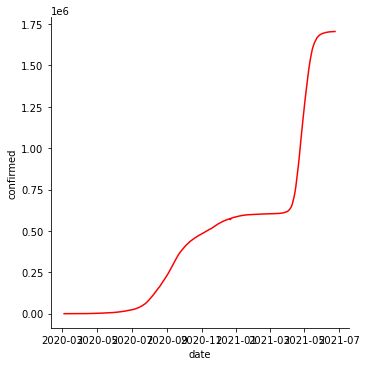

In [177]:
sns.relplot(x="date",y="confirmed",kind="line",data=UP,color='r')

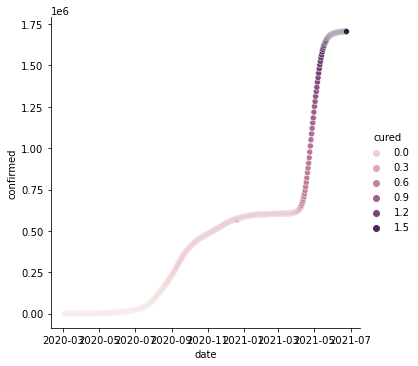

In [179]:
sns.relplot(x="date",y="confirmed",hue="cured",data=UP)

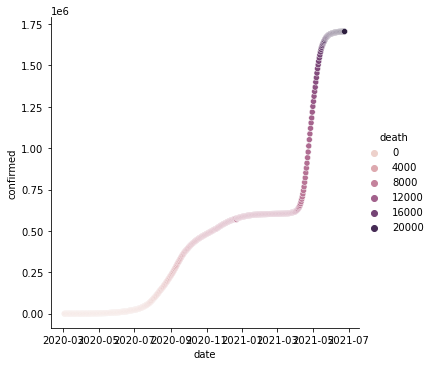

In [180]:
sns.relplot(x="date",y="confirmed",hue="death",data=UP)

In [11]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def ad_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print("1. ADF: ",dftest[0])
    print("1. P-value: ",dftest[1])
    print("1. Num of legs: ",dftest[2])
    print("1. Num of observations: ",dftest[3])
    print("1. critical values: ")
    for key,val in dftest[4].items():
        print("\t",key,":",val)

        
    



In [17]:
ad_test(UP['confirmed'])

1. ADF:  0.5082143215911255
1. P-value:  0.9851206371190067
1. Num of legs:  15
1. Num of observations:  462
1. critical values: 
	 1% : -3.444583778100581
	 5% : -2.8678163032301995
	 10% : -2.570113030490433


# figuring out the arima model

In [18]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [19]:
step_wisefit=auto_arima(UP['confirmed'],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=7899.759, Time=0.41 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8071.985, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=8022.294, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=8038.763, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=7980.981, Time=0.14 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=7951.908, Time=0.21 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=7927.637, Time=0.18 sec
 ARIMA(2,2,3)(0,0,0)[0]             : AIC=7899.679, Time=0.63 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=7901.188, Time=0.37 sec
 ARIMA(3,2,3)(0,0,0)[0]             : AIC=7898.422, Time=0.72 sec
 ARIMA(4,2,3)(0,0,0)[0]             : AIC=7928.699, Time=0.39 sec
 ARIMA(3,2,4)(0,0,0)[0]             : AIC=7840.413, Time=1.10 sec
 ARIMA(2,2,4)(0,0,0)[0]             : AIC=7889.647, Time=1.02 sec
 ARIMA(4,2,4)(0,0,0)[0]             : AIC=7884.377, Time=0.95 sec
 ARIMA(3,2,5)(0,0,0)[0]          

In [20]:
step_wisefit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  478
Model:               SARIMAX(3, 2, 5)   Log Likelihood               -3906.080
Date:                Fri, 02 Jul 2021   AIC                           7830.160
Time:                        23:57:36   BIC                           7867.649
Sample:                             0   HQIC                          7844.901
                                - 478                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          2.0769      0.031     66.383      0.000       2.016       2.138
ar.L2         -1.9936      0.047    -42.430      0.000      -2.086      -1.901
ar.L3          0.8560      0.027     31.815      0.000       0.803       0.909
ma.L1         -2.6939      0.033    -80.648      0.000      -2.759      -2.628
ma.L2          3.6332      0.077     47.167      0.000       3.482       3.784
ma.L3         -2.7716      0.098    -28.352      0.000      -2.963      -2.580
ma.L4          1.2196      0.076     16.128      0.000       1.071       1.368
ma.L5         -0.2194      0.033     -6.646      0.000      -0.284      -0.155
sigma2      8.166e+05   1.85e+04     44.041      0.000     7.8e+05    8.53e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             30689.14
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              25.21   Skew:                             1.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
from statsmodels.tsa.arima_model import ARIMA


In [23]:
print(UP.shape)

(478, 5)


In [162]:
train=UP.iloc[:-30]
test=UP.iloc[-30:]
print(train.shape,test.shape)

(448, 5) (30, 5)


In [163]:
model=ARIMA(train['confirmed'],order=(3,2,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D2.confirmed   No. Observations:                  446
Model:                 ARIMA(3, 2, 5)   Log Likelihood               -3671.740
Method:                       css-mle   S.D. of innovations            906.914
Date:                Sat, 03 Jul 2021   AIC                           7363.480
Time:                        21:40:17   BIC                           7404.483
Sample:                             2   HQIC                          7379.647
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.0290    113.626      0.009      0.993    -221.674     223.732
ar.L1.D2.confirmed     2.0567      0.048     42.691      0.000       1.962       2.151
ar.L2.D2.confirmed    -1.9620      0.072    -27.194      0.000      -2.103      -1.821
ar.L3.D2.confirmed     0.8400      0.040     20.883      0.000       0.761       0.919
ma.L1.D2.confirmed    -2.6809      0.065    -41.466      0.000      -2.808      -2.554
ma.L2.D2.confirmed     3.6065      0.150     24.073      0.000       3.313       3.900
ma.L3.D2.confirmed    -2.7492      0.190    -14.506      0.000      -3.121      -2.378
ma.L4.D2.confirmed     1.2137      0.143      8.495      0.000       0.934       1.494
ma.L5.D2.confirmed    -0.2134      0.057     -3.741      0.000      -0.325      -0.102
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0919           -0.0000j            1.0919           -0.0000
AR.2            0.6220           -0.8387j            1.0442           -0.1485
AR.3            0.6220           +0.8387j            1.0442            0.1485
MA.1            0.5821           -1.0211j            1.1753           -0.1675
MA.2            0.5821           +1.0211j            1.1753            0.1675
MA.3            0.9330           -0.6370j            1.1297           -0.0953
MA.4            0.9330           +0.6370j            1.1297            0.0953
MA.5            2.6586           -0.0000j            2.6586           -0.0000
-----------------------------------------------------------------------------
"""

# prediction on datasets

In [183]:
start=len(train)
end=len(train)+len(test)-1
index_future_dates=pd.date_range(start='2021-05-22',end='2021-06-20')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions May-2021 to June-2021')
pred.index=index_future_dates

#pred=model.predict(start=start,end=end,typ='levels')

#pred.index=UP.index[start:end+1]
print(pred)




2021-05-22    1.678222e+06
2021-05-23    1.682557e+06
2021-05-24    1.686961e+06
2021-05-25    1.691071e+06
2021-05-26    1.694557e+06
2021-05-27    1.697395e+06
2021-05-28    1.699878e+06
2021-05-29    1.702377e+06
2021-05-30    1.705062e+06
2021-05-31    1.707800e+06
2021-06-01    1.710296e+06
2021-06-02    1.712345e+06
2021-06-03    1.713995e+06
2021-06-04    1.715500e+06
2021-06-05    1.717111e+06
2021-06-06    1.718891e+06
2021-06-07    1.720689e+06
2021-06-08    1.722282e+06
2021-06-09    1.723559e+06
2021-06-10    1.724603e+06
2021-06-11    1.725618e+06
2021-06-12    1.726763e+06
2021-06-13    1.728038e+06
2021-06-14    1.729299e+06
2021-06-15    1.730388e+06
2021-06-16    1.731258e+06
2021-06-17    1.732005e+06
2021-06-18    1.732782e+06
2021-06-19    1.733680e+06
2021-06-20    1.734666e+06
Freq: D, Name: ARIMA predictions May-2021 to June-2021, dtype: float64


<AxesSubplot:>

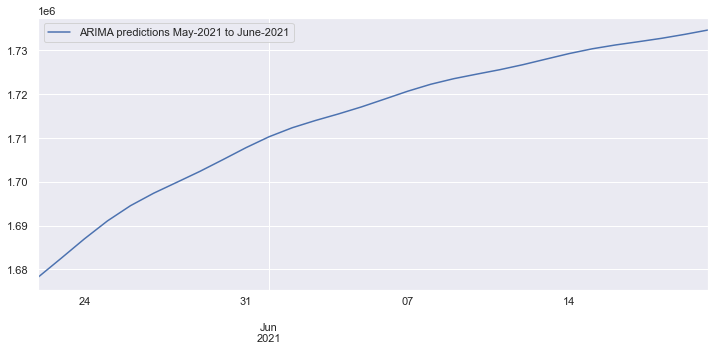

In [196]:

pred.plot(figsize=(12,5),legend=True,y='confirmed')






<AxesSubplot:xlabel='date'>

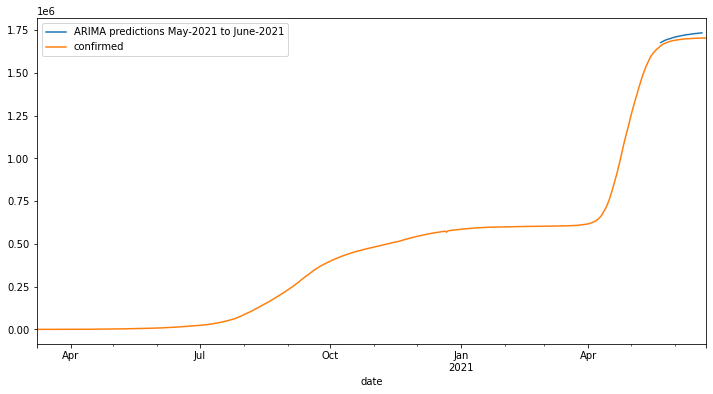

In [187]:
pred.plot(figsize=(12,6),legend=True)
upreal['confirmed'].plot(x='date',y='confirmed',figsize=(12,6),legend=True)


In [76]:
test['confirmed'].mean()

1579520.8166666667

In [97]:
x_col=['date','confirmed']
upreal=UP[x_col].groupby('date').sum()[4:-1]
upreal=pd.DataFrame(upreal)
print(upreal)

            confirmed
date                 
2020-03-08          7
2020-03-09          7
2020-03-10          7
2020-03-11          9
2020-03-12         11
...               ...
2021-06-19    1703882
2021-06-20    1704139
2021-06-21    1704358
2021-06-22    1704476
2021-06-23    1704678

[473 rows x 1 columns]


In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['confirmed']))
print(rmse)

1419249.6213531129


# Future prediction

In [79]:
model2=ARIMA(UP['confirmed'],order=(3,2,5))
model2=model2.fit()
model2.summary()
UP.tail()

date          state    cured  death  confirmed
16236 2021-06-20  Uttar Pradesh  1677050  22132    1704139
16272 2021-06-21  Uttar Pradesh  1677611  22178    1704358
16308 2021-06-22  Uttar Pradesh  1678089  22224    1704476
16344 2021-06-23  Uttar Pradesh  1678486  22282    1704678
16380 2021-06-24  Uttar Pradesh  1678788  22336    1704790

In [182]:
index_future_dates=pd.date_range(start='2021-06-24',end='2021-09-24')
#print(index_future_dates)
predn=model2.predict(start=len(UP),end=len(UP)+92,typ='levels').rename('ARIMA Predictions in upcoming three months July,August,September-2021')
predn.index=index_future_dates
print(predn)


2021-06-24    1.704963e+06
2021-06-25    1.705148e+06
2021-06-26    1.705346e+06
2021-06-27    1.705546e+06
2021-06-28    1.705739e+06
                  ...     
2021-09-20    1.725970e+06
2021-09-21    1.726227e+06
2021-09-22    1.726484e+06
2021-09-23    1.726741e+06
2021-09-24    1.726998e+06
Freq: D, Name: ARIMA Predictions in upcoming three months July,August,September-2021, Length: 93, dtype: float64


<AxesSubplot:>

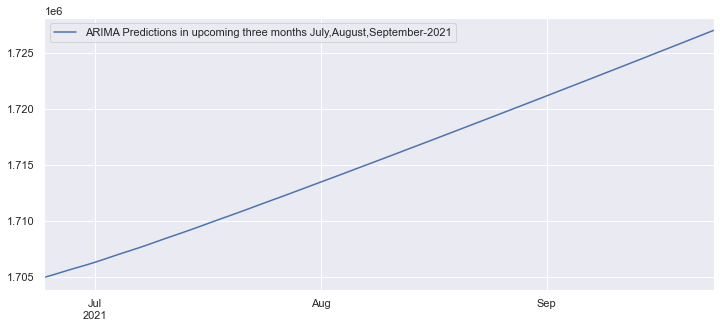

In [193]:
predn.plot(figsize=(12,5),legend=True)



<AxesSubplot:xlabel='date'>

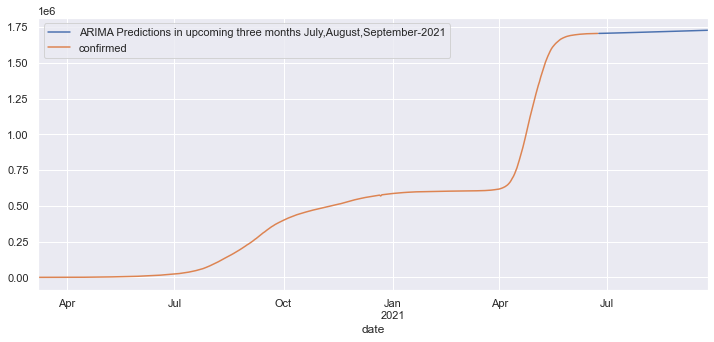

In [194]:

predn.plot(figsize=(12,5),legend=True)
upreal['confirmed'].plot(figsize=(12,5),legend=True)